In [8]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid, GridNode
from pathfinding.finder.a_star import AStarFinder
import logging
from PIL.Image import Image, fromarray
import PIL.Image
from PIL import ImageFilter, ImageOps
from typing import Iterable
import numpy as np

matrix = []
_image = PIL.Image.open("/Users/igor/Default.map/Occupancy Grid/labyrinth.tif") #.resize((250, 250))
_robotRadius = 0.5 # [m]
_imageSizeM = 10
_start = (489.0, 27.0)
_end = (968.0, 1010.0)
finder = AStarFinder(diagonal_movement=DiagonalMovement.always)

In [9]:
ratio = _imageSizeM / _image.width
start = (_start[0]*ratio, _start[1]*ratio)
end = (_end[0]*ratio, _end[1]*ratio)

radius: 5


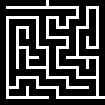

In [10]:
# 1. Apply Max filter

radius = int(_robotRadius * _imageSizeM)
print(f"radius: {radius}")
mf_img = _image.filter(ImageFilter.MinFilter()) #if radius > 0 else _image
display(mf_img)

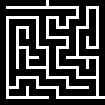

In [11]:

# # 2. Invert image
# in_img = ImageOps.invert(mf_img)
# display(in_img)

# 3. Covert to array
matrix = np.array(mf_img)

# # 4. Set obstacles to zero
# matrix[matrix == 255] = 0
display(fromarray(matrix))

In [12]:
# Run path finder
grid  = Grid(matrix=list(matrix))
start = grid.node(int(start[0]), int(start[1]))
end   = grid.node(int(end[0]), int(end[1]))

path: list[GridNode]; result = []
path, runs = finder.find_path(start, end, grid)
for item in path:
    result.append((item.x, item.y))

print(f"Runs: {runs},\nPath: {result}")

Runs: 1136,
Path: [(46, 2), (46, 3), (47, 4), (48, 5), (49, 6), (50, 7), (51, 8), (52, 8), (53, 8), (54, 8), (55, 8), (56, 8), (57, 8), (58, 8), (59, 8), (60, 8), (61, 8), (62, 8), (63, 8), (64, 8), (65, 8), (66, 8), (67, 8), (68, 8), (69, 8), (70, 8), (71, 8), (72, 8), (73, 8), (74, 8), (75, 8), (76, 9), (76, 10), (76, 11), (76, 12), (76, 13), (76, 14), (76, 15), (75, 16), (74, 17), (73, 18), (72, 18), (71, 18), (70, 18), (69, 18), (68, 19), (68, 20), (68, 21), (68, 22), (68, 23), (67, 24), (66, 25), (65, 26), (64, 26), (63, 26), (62, 26), (61, 26), (60, 26), (59, 26), (58, 25), (58, 24), (58, 23), (58, 22), (58, 21), (57, 20), (56, 19), (55, 18), (54, 18), (53, 18), (52, 18), (51, 18), (50, 18), (49, 18), (48, 19), (48, 20), (48, 21), (48, 22), (48, 23), (48, 24), (48, 25), (48, 26), (48, 27), (48, 28), (48, 29), (48, 30), (48, 31), (48, 32), (48, 33), (48, 34), (48, 35), (49, 36), (50, 37), (51, 38), (52, 38), (53, 38), (54, 38), (55, 38), (56, 38), (57, 38), (58, 38), (59, 38), (60